# Sarah Theriot
# Project 2 Code

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")

## Step 2: Load the CSV

In [3]:
# Load the Netflix customer churn dataset
df = pd.read_csv(r"C:\Users\sarah\netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## Step 3: EDA

In [6]:
# Basic structure of the dataset
df.shape

(5000, 14)

In [8]:
# Info about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [10]:
# Quick summary stats
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [12]:
# Check for missing values
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

## Step 4: Data Cleaning

In [14]:
# Drop customer_id (not useful for prediction)
df = df.drop(columns=['customer_id'])

# Label encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop('churned', axis=1)
y = df['churned']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 5: Train/Test Split & Model Training

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## Step 6: Model Evaluation 

Accuracy: 0.8770

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       498
           1       0.87      0.89      0.88       502

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



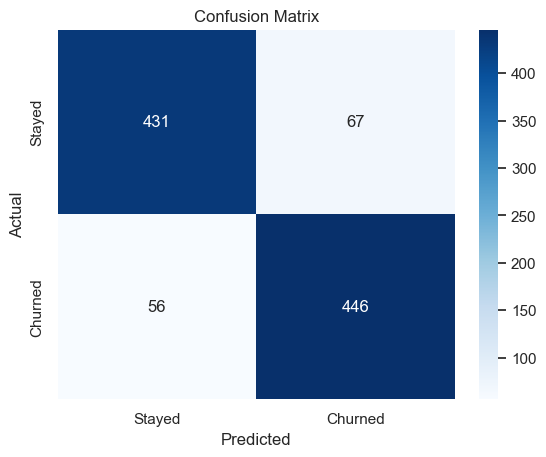

In [20]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 7: Feature Importance

                   Feature  Coefficient
4          last_login_days     2.099187
5                   region     0.070760
0                      age     0.013476
11          favorite_genre     0.002113
8           payment_method    -0.028209
6                   device    -0.030435
1                   gender    -0.067767
2        subscription_type    -0.479959
7              monthly_fee    -0.569262
9       number_of_profiles    -0.974852
3              watch_hours    -3.351100
10  avg_watch_time_per_day    -4.355584


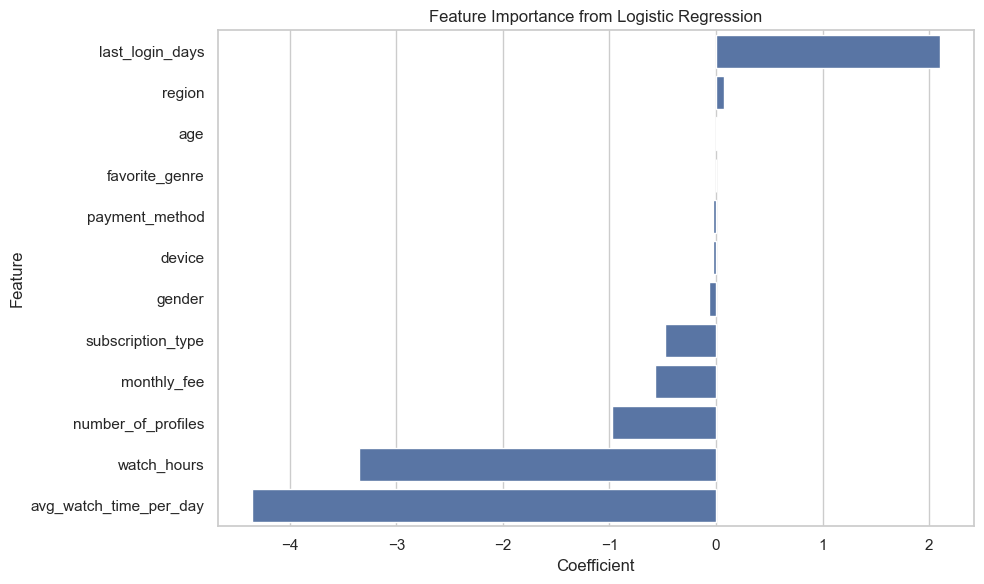

In [23]:
# Create DataFrame of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Show coefficients table
print(coef_df)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance from Logistic Regression")
plt.tight_layout()
plt.show()

## Step 8: Visualizations

### Visual 1: Churn Distribution

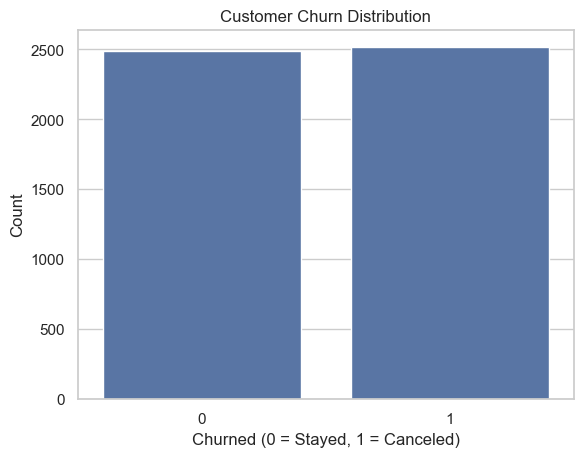

In [27]:
sns.countplot(data=df, x='churned')
plt.title('Customer Churn Distribution')
plt.xlabel('Churned (0 = Stayed, 1 = Canceled)')
plt.ylabel('Count')
plt.show()

### Visual 2: Last Login Days by Churn Status

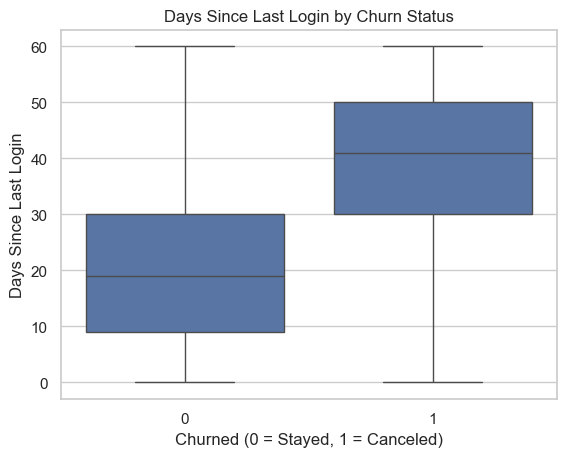

In [30]:
sns.boxplot(data=df, x='churned', y='last_login_days')
plt.title('Days Since Last Login by Churn Status')
plt.xlabel('Churned (0 = Stayed, 1 = Canceled)')
plt.ylabel('Days Since Last Login')
plt.show()

### Visual 3: Average Watch Time Per Day by Churn Status

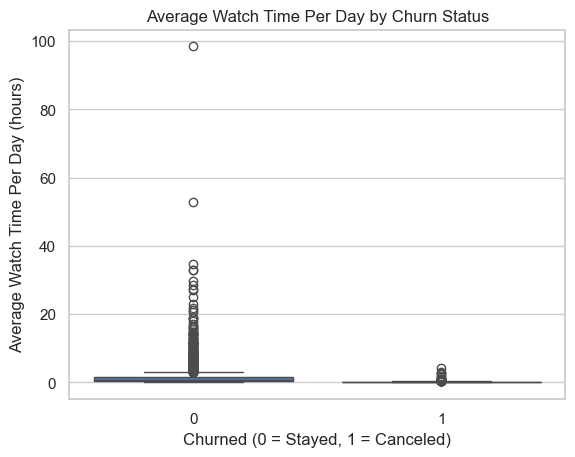

In [33]:
sns.boxplot(data=df, x='churned', y='avg_watch_time_per_day')
plt.title('Average Watch Time Per Day by Churn Status')
plt.xlabel('Churned (0 = Stayed, 1 = Canceled)')
plt.ylabel('Average Watch Time Per Day (hours)')
plt.show()

### Visual 4: Subscription Type vs. Churn

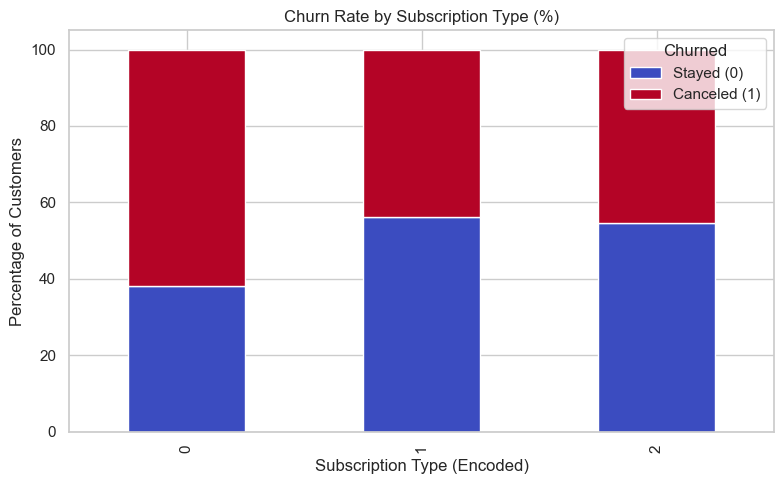

In [36]:
churn_sub = pd.crosstab(df['subscription_type'], df['churned'], normalize='index') * 100
churn_sub.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Churn Rate by Subscription Type (%)')
plt.xlabel('Subscription Type (Encoded)')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churned', labels=['Stayed (0)', 'Canceled (1)'])
plt.tight_layout()
plt.show()

### Visual 5: Number of Profiles vs. Churn

C:\Users\sarah\AppData\Local\Temp\ipykernel_8076\1124848444.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='number_of_profiles', palette='Set3')


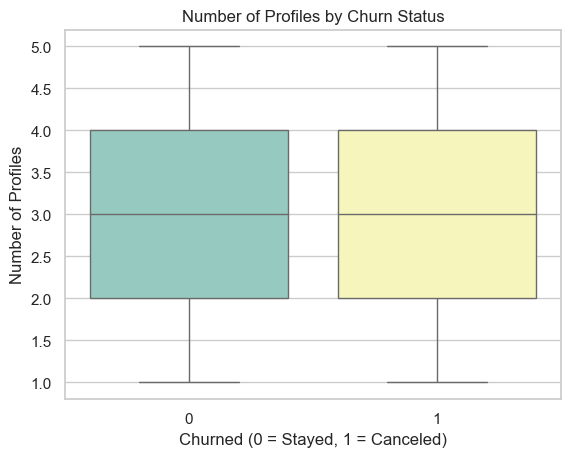

In [41]:
sns.boxplot(data=df, x='churned', y='number_of_profiles', palette='Set3')
plt.title('Number of Profiles by Churn Status')
plt.xlabel('Churned (0 = Stayed, 1 = Canceled)')
plt.ylabel('Number of Profiles')
plt.show()